In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets
test_essays = pd.read_csv('/content/drive/MyDrive/deep learning_project/test_essays.csv')
train_essays = pd.read_csv('/content/drive/MyDrive/deep learning_project/train_essays.csv')
train_prompts = pd.read_csv('/content/drive/MyDrive/deep learning_project/train_prompts.csv')
sub_sample = pd.read_csv('/content/drive/MyDrive/deep learning_project/sample_submission.csv')
external_file = pd.read_csv('/content/drive/MyDrive/deep learning_project/ai_generated_train_essays.csv')

In [ ]:
# Analyzing the 'train_essays' dataset
test_essays['word_count'] = test_essays['text'].apply(lambda x: len(x.split()))
test_essays['char_count'] = test_essays['text'].apply(len)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(test_essays['word_count'], kde=True, color='blue')
plt.title('Word Count Distribution in Train Essays')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_essays['char_count'], kde=True, color='green')
plt.title('Character Count Distribution in Train Essays')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from collections import Counter

# Original Dataset EDA
original_gen_counts = train_essays['generated'].value_counts()

fig_orig = px.bar(original_gen_counts, title='Original Dataset - Distribution of AI and Human Essays')
fig_orig.show()

train_essays['essay_len'] = train_essays['text'].str.split().map(len)
fig_len_orig = px.histogram(train_essays, x='essay_len', title='Original Dataset - Essay Length Distribution')
fig_len_orig.show()

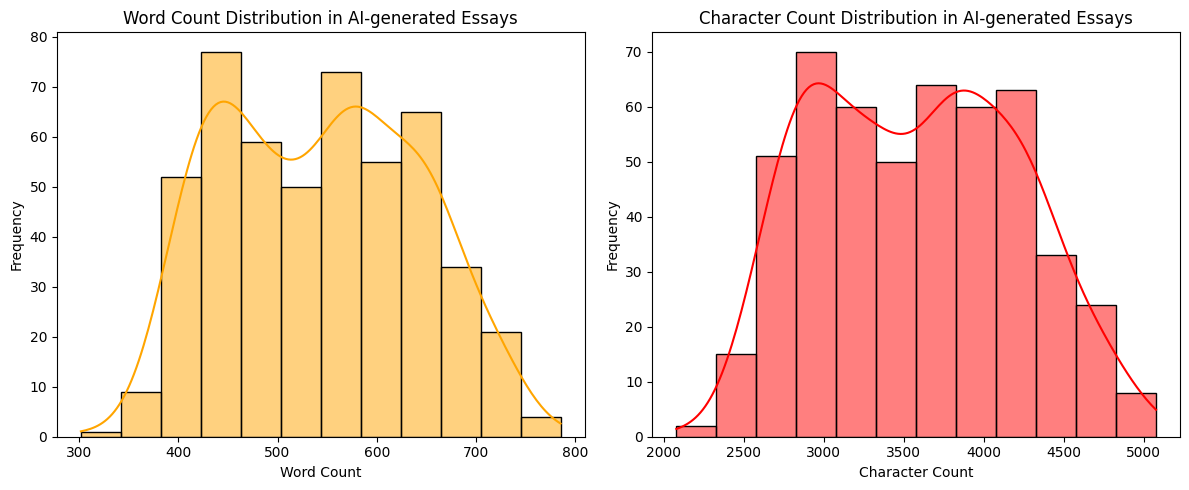

In [ ]:

# Analyzing the 'external_file' dataset (AI-generated essays)
external_file['word_count'] = external_file['text'].apply(lambda x: len(x.split()))
external_file['char_count'] = external_file['text'].apply(len)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(external_file['word_count'], kde=True, color='orange')
plt.title('Word Count Distribution in AI-generated Essays')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(external_file['char_count'], kde=True, color='red')
plt.title('Character Count Distribution in AI-generated Essays')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Most common words (original dataset)
word_occ_orig = Counter([word.lower() for words in train_essays['text'] for word in words.split()])
df_temp_orig = pd.DataFrame(word_occ_orig.most_common(10))
df_temp_orig.columns = ['Common Words', 'count']

fig_common_words_orig = px.bar(df_temp_orig, x='count', y='Common Words', orientation='h', title='Original Dataset - Most Common Words')
fig_common_words_orig.show()

merged dataset

In [ ]:
import pandas as pd

# Load datasets
test_essays = pd.read_csv('/content/drive/MyDrive/deep learning_project/test_essays.csv')
train_essays = pd.read_csv('/content/drive/MyDrive/deep learning_project/train_essays.csv')
train_prompts = pd.read_csv('/content/drive/MyDrive/deep learning_project/train_prompts.csv')
sub_sample = pd.read_csv('/content/drive/MyDrive/deep learning_project/sample_submission.csv')
external_file = pd.read_csv('/content/drive/MyDrive/deep learning_project/ai_generated_train_essays.csv')

# Combine datasets
combine_essays = pd.concat([external_file, train_essays]).sample(frac=1).reset_index(drop=True)


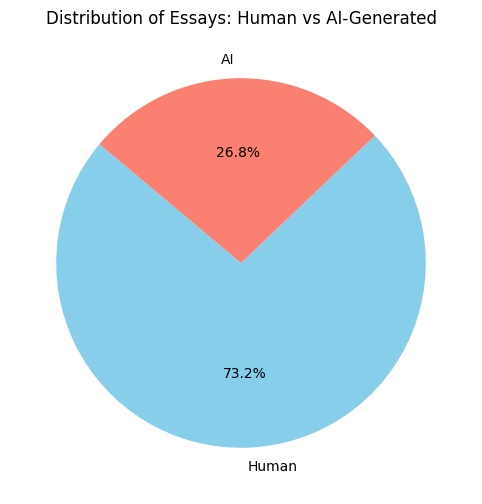

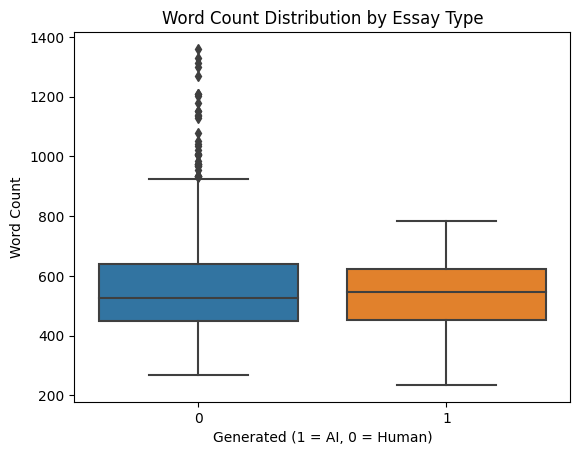

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of essays (AI vs Human)
human_vs_ai_counts = combine_essays['generated'].value_counts()
labels = ['Human', 'AI']
plt.figure(figsize=(8, 6))
plt.pie(human_vs_ai_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Essays: Human vs AI-Generated')
plt.show()

# Word Count Distribution
combine_essays['word_count'] = combine_essays['text'].apply(lambda x: len(x.split()))
sns.boxplot(x='generated', y='word_count', data=combine_essays)
plt.title('Word Count Distribution by Essay Type')
plt.xlabel('Generated (1 = AI, 0 = Human)')
plt.ylabel('Word Count')
plt.show()


In [ ]:
# merged Dataset
combined_gen_counts = combine_essays['generated'].value_counts()

fig_comb = px.bar(combined_gen_counts, title='Combined Dataset - Distribution of AI and Human Essays')
fig_comb.show()

combine_essays['essay_len'] = combine_essays['text'].str.split().map(len)
fig_len_comb = px.histogram(combine_essays, x='essay_len', title='Combined Dataset - Essay Length Distribution')
fig_len_comb.show()

In [ ]:
# Most common words (combined dataset)
word_occ_comb = Counter([word.lower() for words in combine_essays['text'] for word in words.split()])
df_temp_comb = pd.DataFrame(word_occ_comb.most_common(10))
df_temp_comb.columns = ['Common Words', 'count']

fig_common_words_comb = px.bar(df_temp_comb, x='count', y='Common Words', orientation='h', title='Combined Dataset - Most Common Words')
fig_common_words_comb.show()

In [ ]:


# Histograms to show the distribution of essay lengths and vocabulary richness
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=merged_data, x='text_length', hue='generated', kde=True, bins=30)
plt.title('Histogram of Essay Lengths')
plt.xlabel('Essay Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=merged_data, x='vocab_richness', hue='generated', kde=True, bins=30)
plt.title('Histogram of Vocabulary Richness')
plt.xlabel('Vocabulary Richness')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# KDE Plots to visualize the density of these distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=merged_data, x='text_length', hue='generated', fill=True)
plt.title('Density Plot of Essay Lengths')
plt.xlabel('Essay Length')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=merged_data, x='vocab_richness', hue='generated', fill=True)
plt.title('Density Plot of Vocabulary Richness')
plt.xlabel('Vocabulary Richness')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Basic text cleaning
combine_essays['cleaned_text'] = combine_essays['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(combine_essays['cleaned_text'])
sequences = tokenizer.texts_to_sequences(combine_essays['cleaned_text'])
X = pad_sequences(sequences, maxlen=512)
y = combine_essays['generated'].values


using bi-LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Model building
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=512))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 512, 128)          98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 512, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2700097 (10.30 MB)
Trainable params: 27000

In [ ]:
# Train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.20)


Epoch 1/5
19/19 [==============================] - 36s 2s/step - loss: 0.5624 - accuracy: 0.7019 - val_loss: 0.3418 - val_accuracy: 0.8040
Epoch 2/5
19/19 [==============================] - 25s 1s/step - loss: 0.1790 - accuracy: 0.9592 - val_loss: 0.1008 - val_accuracy: 0.9867
Epoch 3/5
19/19 [==============================] - 24s 1s/step - loss: 0.0609 - accuracy: 0.9933 - val_loss: 0.0425 - val_accuracy: 0.9934
Epoch 4/5
19/19 [==============================] - 25s 1s/step - loss: 0.0449 - accuracy: 0.9900 - val_loss: 0.0210 - val_accuracy: 0.9967
Epoch 5/5
19/19 [==============================] - 31s 2s/step - loss: 0.0247 - accuracy: 0.9967 - val_loss: 0.0083 - val_accuracy: 1.0000


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


12/12 [==============================] - 2s 165ms/step - loss: 0.0084 - accuracy: 1.0000
Test Accuracy: 1.00


In [ ]:
from keras.models import load_model
import pickle


# Save the model and tokenizer
model.save('bi-lstm_model_from_bilstm_final_file.h5')  # saves the architecture, weights, and even the optimizer's state
with open('tokenizer_bilstm_final_file.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Later on, when you want to make predictions, load the model and tokenizer
loaded_model = load_model('bi-lstm_model_from_bilstm_final_file.h5')
with open('tokenizer_bilstm_final_file.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:

# Preprocess the test data with the loaded tokenizer
test_sequences = loaded_tokenizer.texts_to_sequences(test_essays['text'])
test_padded = pad_sequences(test_sequences, maxlen=512)



In [ ]:
# Making predictions on the test set
test_predictions = loaded_model.predict(test_padded).flatten()


1/1 [==============================] - 1s 1s/step


In [ ]:
test_predictions

array([0.00494153, 0.00494153, 0.00494153], dtype=float32)

In [ ]:

test_classes = (test_predictions > 0.5).astype("int32")

print(test_classes[:10])

[0 0 0]


In [ ]:

import pandas as pd

submission_df = pd.DataFrame({
    'id': test_essays['id'],
    'prediction': test_classes
})

# Save the DataFrame to a CSV file
submission_file_path = '/content/drive/MyDrive/DATA_255/projecty/bilstm/submission_bilstm.csv'

print(f'Submission file saved to {submission_file_path}')


Submission file saved to /content/drive/MyDrive/DATA_255/projecty/bilstm/submission_bilstm.csv


In [ ]:
# ChatGPT 3.5 Generated paragraphs on prompt ID 0
gpt_text = 'In our rapidly evolving world, the convenience of personal automobiles has become deeply ingrained in our daily lives. However, it is essential to consider the broader implications of our reliance on cars, not just for individual comfort but also for the collective well-being of our society and the environment. This essay explores the advantages of limiting car usage, drawing insights from multiple sources to underscore the importance of embracing alternative transportation methods for a sustainable future.'
gpt_text_2 = 'One significant advantage of reducing car usage lies in the realm of environmental preservation. According to a report by the Environmental Protection Agency (EPA), the transportation sector is a major contributor to air pollution and greenhouse gas emissions. Cars emit pollutants that degrade air quality, leading to respiratory problems and other health issues. By limiting car usage and promoting alternatives such as public transportation, cycling, and walking, we can collectively reduce our carbon footprint and mitigate the impact of climate change.'
gpt_text_3 = 'Furthermore, limiting car usage can have profound positive effects on traffic congestion and urban planning. A study conducted by the Urban Land Institute reveals that the overreliance on cars contributes to congested roadways, leading to increased travel times and economic inefficiencies. Implementing measures to limit car usage, such as developing comprehensive public transportation systems and promoting carpooling, can alleviate traffic congestion, making cities more livable and efficient.'

# BBC news articles
bbc_text = 'Those alleged conversations were outlined in an indictment unsealed by US prosecutors on Wednesday. The US Justice Department has charged Mr Gupta with an elaborate plot to assassinate a dual US-Canadian citizen based in New York, a plot allegedly directed by an Indian government employee.'
bbc_text_1 = 'In the Paris Agreement itself, the baseline for pre-industrial measures wasn\'t defined. But the International Panel on Climate Change uses a baseline of 1850-1900. That\'s because it\'s the earliest period with reliable, near-global measurements. It\'s true that some warming from human activity had already occurred by that point, because the industrial revolution began in the early 1700s. But having good historical data for a reliable baseline is crucial to measure changes happening today.'
bbc_text_2 = 'The room bustled with the din of volunteer waitstaff and diners amid a jazzy soundtrack playing overhead. A knife suddenly clanged against the floor. No one seemed to hear it except for renowned, three-Michelin starred chef Massimo Bottura, who instinctively ran over to pick it up, gave the diner a new utensil and initiated a warm, friendly chat to ensure he was enjoying his meal. With Bottura, the patrons at this church hall are given the same level of hospitality as those at his high-end restaurants like the famed Osteria Francescana and the newly opened Al Gatto Verde in Modena, Italy.'

In [ ]:
new_texts = [
    gpt_text, gpt_text_2, gpt_text_3,
    bbc_text, bbc_text_1, bbc_text_2
]

In [ ]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    return text

# Apply cleaning to the new texts
new_texts_cleaned = [clean_text(text) for text in new_texts]

# Convert to sequences using the trained tokenizer
new_sequences = tokenizer.texts_to_sequences(new_texts_cleaned)

# Pad the sequences
new_padded = pad_sequences(new_sequences, maxlen=512)


In [ ]:
# Load the saved weights (assuming the model architecture is defined)
model.load_weights('bi-lstm_model_from_bilstm_final_file.h5')

# Make predictions
new_predictions = model.predict(new_padded).flatten()

# Display predictions
for i, prediction in enumerate(new_predictions):
    label = 'AI-generated' if prediction > 0.5 else 'Human-written'
    print(f"Text {i+1}: {label} (Probability: {prediction:.4f})")


1/1 [==============================] - 2s 2s/step
Text 1: AI-generated (Probability: 0.9582)
Text 2: Human-written (Probability: 0.3066)
Text 3: AI-generated (Probability: 0.9878)
Text 4: Human-written (Probability: 0.0043)
Text 5: Human-written (Probability: 0.0048)
Text 6: Human-written (Probability: 0.0045)


In [ ]:
gpt_para="""["Title: The Future of Electric Cars and Their Impact on the Environment
As we venture further into the 21st century, the automotive industry is undergoing a significant transformation, with electric cars at the forefront of this change. The rise of electric vehicles (EVs) is not just a trend but a pivotal shift in how we think about transportation and its impact on the environment.

Electric cars offer a myriad of benefits over their gasoline-powered counterparts. Foremost among these is their contribution to reducing air pollution. Traditional cars emit a significant amount of greenhouse gases and other pollutants, contributing to climate change and affecting air quality. Electric cars, on the other hand, produce zero emissions at the tailpipe. This characteristic makes them a key player in efforts to combat climate change and improve air quality in urban areas.

Another significant advantage of electric cars is their efficiency. Electric motors convert a higher percentage of electrical energy into driving power than internal combustion engines, which burn fuel to create power. This efficiency not only makes EVs more environmentally friendly but also more economical in the long run, despite the higher initial purchase cost. As battery technology improves and charging infrastructure expands, the total cost of owning an EV is expected to become lower than that of traditional vehicles.

However, the transition to electric cars is not without challenges. One of the primary concerns is the source of electricity used to power these vehicles. If the electricity comes from fossil fuels, the environmental benefits of EVs could be diminished. Therefore, the integration of renewable energy sources into the power grid is crucial for maximizing the environmental advantages of electric vehicles.

Additionally, there is the challenge of building a robust charging infrastructure to support the widespread adoption of EVs. Urban areas, in particular, need a strategic plan for installing a sufficient number of charging stations to meet the growing demand. This infrastructure is essential for alleviating 'range anxiety' – the fear that an electric vehicle will run out of power before reaching its destination or a charging point.

In conclusion, electric cars represent a promising step towards a more sustainable and environmentally-friendly future. As technology advances and concerns regarding electricity sources and charging infrastructure are addressed, we can expect to see more electric vehicles on the road, leading the way towards a greener and cleaner world."] """

In [ ]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    return text

# Apply cleaning to the new texts
gpt_para_cleaned = [clean_text(text) for text in gpt_para]

# Convert to sequences using the trained tokenizer
gpt_para_sequences = tokenizer.texts_to_sequences(gpt_para_cleaned)

# Pad the sequences
gpt_para_padded = pad_sequences(gpt_para_sequences, maxlen=512)


In [ ]:
# Load the saved weights (assuming the model architecture is defined)
model.load_weights('bi-lstm_model_from_bilstm_final_file.h5')

# Make predictions
gpt_para_predictions = model.predict(gpt_para_padded).flatten()

# Display predictions
for i, prediction in enumerate(gpt_para_predictions):
    label = 'AI-generated' if prediction > 0.5 else 'Human-written'
    print(f"Text {i+1}: {label} (Probability: {prediction:.4f})")


v2_applyinmg lemmatization, adjustments to the model _@11.33

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    # Tokenize and lemmatize
    words = word_tokenize(text.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Assuming combine_essays is your DataFrame
combine_essays['cleaned_text'] = combine_essays['text'].apply(preprocess_text)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(combine_essays['cleaned_text'], combine_essays['generated'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 512
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_seq_length))
model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 128)          640000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 512, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 780097 (2.98 MB)
Trainable params: 780097 (2.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.models import load_model
import pickle


# Save the model and tokenizer
model.save('bi-lstm_model_from_bilstm_final_file_v2.h5')  # saves the architecture, weights, and even the optimizer's state
with open('tokenizer_bilstm_final_file_v2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Later on, when you want to make predictions, load the model and tokenizer
loaded_model = load_model('bi-lstm_model_from_bilstm_final_file_v2.h5')
with open('tokenizer_bilstm_final_file_v2.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)



In [ ]:
gpt_para="""["Title: The Future of Electric Cars and Their Impact on the Environment
As we venture further into the 21st century, the automotive industry is undergoing a significant transformation, with electric cars at the forefront of this change. The rise of electric vehicles (EVs) is not just a trend but a pivotal shift in how we think about transportation and its impact on the environment.

Electric cars offer a myriad of benefits over their gasoline-powered counterparts. Foremost among these is their contribution to reducing air pollution. Traditional cars emit a significant amount of greenhouse gases and other pollutants, contributing to climate change and affecting air quality. Electric cars, on the other hand, produce zero emissions at the tailpipe. This characteristic makes them a key player in efforts to combat climate change and improve air quality in urban areas.

Another significant advantage of electric cars is their efficiency. Electric motors convert a higher percentage of electrical energy into driving power than internal combustion engines, which burn fuel to create power. This efficiency not only makes EVs more environmentally friendly but also more economical in the long run, despite the higher initial purchase cost. As battery technology improves and charging infrastructure expands, the total cost of owning an EV is expected to become lower than that of traditional vehicles.

However, the transition to electric cars is not without challenges. One of the primary concerns is the source of electricity used to power these vehicles. If the electricity comes from fossil fuels, the environmental benefits of EVs could be diminished. Therefore, the integration of renewable energy sources into the power grid is crucial for maximizing the environmental advantages of electric vehicles.

Additionally, there is the challenge of building a robust charging infrastructure to support the widespread adoption of EVs. Urban areas, in particular, need a strategic plan for installing a sufficient number of charging stations to meet the growing demand. This infrastructure is essential for alleviating 'range anxiety' – the fear that an electric vehicle will run out of power before reaching its destination or a charging point.

In conclusion, electric cars represent a promising step towards a more sustainable and environmentally-friendly future. As technology advances and concerns regarding electricity sources and charging infrastructure are addressed, we can expect to see more electric vehicles on the road, leading the way towards a greener and cleaner world."] """

In [ ]:
# New user-provided texts
#new_texts = [gpt_text, gpt_text_2, gpt_text_3, bbc_text, bbc_text_1, bbc_text_2]

new_texts_cleaned = [preprocess_text(text) for text in gpt_para]
new_sequences = tokenizer.texts_to_sequences(new_texts_cleaned)
new_padded = pad_sequences(new_sequences, maxlen=max_seq_length, padding='post')

# Predicting with the model
new_predictions = model.predict(new_padded).flatten()

# Displaying predictions
for i, prediction in enumerate(new_predictions):
    label = 'AI-generated' if prediction > 0.5 else 'Human-written'
    print(f"Text {i+1}: {label} (Probability: {prediction:.4f})")


In [ ]:
import pandas as pd

# Load datasets
#test_essays = pd.read_csv('/content/drive/MyDrive/deep learning_project/test_essays.csv')

training_essay=pd.read_csv('/content/drive/MyDrive/deep learning_project/sunilthe.csv')

In [ ]:
training_essay.head(10)

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
5,A Paradigm Shift in Urban Living In an era ...,1
6,Revolutionizing Urban Living In an age defi...,1
7,Pioneering Sustainable Urban Living In an a...,1
8,Reimagining Urban Living In a rapidly urban...,1
9,A Vision of Urban Sustainability In our rap...,1


In [ ]:
#check if thie model works fine with this dataset:
# Assuming 'new_data' is a pandas DataFrame with the new text
new_data='  Pioneering Sustainable Urban Living  In an era marked by rapid urbanization, car-free cities have emerged as a visionary solution to the many challenges that densely populated urban areas face. The concept of car-free cities envisions a future where private automobiles are either restricted or entirely absent, making way for sustainable transportation alternatives and green, people-centered urban spaces. This essay delves into the idea of car-free cities, exploring their potential benefits, challenges, and solutions.  Car-free cities are a response to the urgent need for sustainable urban living:  Environmental Sustainability: The reduced use of cars significantly lowers air pollution and greenhouse gas emissions, contributing to a healthier planet. These cities serve as beacons of environmental responsibility in an era where climate change is a pressing concern.  Public Health: Car-free cities prioritize pedestrian and cyclist safety, resulting in fewer accidents and better health outcomes. Decreased air pollution levels lead to improved respiratory and cardiovascular health among residents.  Optimal Space Utilization: These cities make efficient use of urban space by repurposing parking lots and roads into parks, green spaces, and pedestrian zones. The urban landscape is transformed into an inviting and vibrant place to live.  Traffic Congestion Reduction: With fewer private cars on the road, traffic congestion is greatly reduced, resulting in shorter commutes and less stress for city dwellers.  Economic Benefits: Car ownership can be a costly endeavor. By reducing their reliance on private vehicles, residents in car-free cities have the opportunity to save money on vehicle-related expenses, improving their overall financial stability.  However, the transition to car-free cities presents a unique set of challenges:  Resistance to Change: Many individuals depend heavily on their cars for daily routines and commutes, and the transition to car-free living may face resistance from those who fear the loss of convenience and personal freedom.  Public Transportation Infrastructure: Effective public transportation systems are crucial for the success of car-free cities. Substantial investments are needed to expand and enhance public transit options, providing convenient alternatives to private cars.  Economic Impact: Businesses relying on car-dependent customers may experience declining revenues during the transition. Addressing this economic impact and supporting affected businesses is a critical aspect of the transition.  Urban Planning and Infrastructure: The redesign of urban areas for car-free living demands comprehensive planning and significant investments in infrastructure, which can be a complex and time-consuming process.  Solutions to successfully implement car-free cities include the expansion and improvement of public transportation, the promotion of active transportation methods such as walking and cycling, the encouragement of carpooling and ride-sharing, the adoption of electric and sustainable transportation, and a focus on public education and awareness.  In conclusion, car-free cities offer a glimpse into a more sustainable and vibrant urban future. Despite the challenges, the potential benefits in terms of environmental sustainability, public health, efficient urban living, and cost savings make them a compelling goal. By investing in public transportation, promoting alternative transportation methods, and involving the public in the planning process, cities can work towards a future where private cars are no longer the dominant mode of transportation. Car-free cities represent an inspiring vision of a more sustainable and people-centric urban environment.'
#new_texts = new_data['text'].tolist()

# Preprocess the new texts
new_texts_cleaned = [preprocess_text(text) for text in new_texts]

# Tokenize and pad the new sequences
new_sequences = tokenizer.texts_to_sequences(new_texts_cleaned)
new_padded = pad_sequences(new_sequences, maxlen=max_seq_length, padding='post')

model.load_weights('bi-lstm_model_from_bilstm_final_file_v2.h5')

# Predict with the model
new_predictions = model.predict(new_padded).flatten()

# Interpret and display predictions
for i, prediction in enumerate(new_predictions):
    label = 'AI-generated' if prediction > 0.5 else 'Human-written'
    print(f"Text {i}: {label} (Probability: {prediction:.4f})")


1/1 [==============================] - 0s 125ms/step
Text 0: Human-written (Probability: 0.4969)
Text 1: Human-written (Probability: 0.4970)
Text 2: Human-written (Probability: 0.4958)
Text 3: Human-written (Probability: 0.4947)
Text 4: Human-written (Probability: 0.4952)
Text 5: Human-written (Probability: 0.4947)


not generalizing well